In [2]:
from tensorflow import keras

from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

from keras.preprocessing.image import ImageDataGenerator

2024-08-21 13:08:18.641883: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
training_dir = 'data/horse-or-human/training'
validation_dir = 'data/horse-or-human/validation'

training_zip_file_name = 'horse-or-human.zip'
validation_zip_file_name = 'validation-horse-or-human.zip'

In [7]:
# Dowload the training dataset
import urllib.request

url = 'https://storage.googleapis.com/learning-datasets/horse-or-human.zip'

urllib.request.urlretrieve(url, training_zip_file_name)

('horse-or-human.zip', <http.client.HTTPMessage at 0x7f7ce005a6b0>)

In [8]:
# Dowload the validation dataset
import urllib.request

url = 'https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip'

urllib.request.urlretrieve(url, validation_zip_file_name)

('validation-horse-or-human.zip', <http.client.HTTPMessage at 0x7f7ce005ac20>)

In [9]:
# Extract the datasets

import zipfile

zip_ref = zipfile.ZipFile(training_zip_file_name, 'r')
zip_ref.extractall(training_dir)
zip_ref.close()

zip_ref = zipfile.ZipFile(validation_zip_file_name, 'r')
zip_ref.extractall(validation_dir)
zip_ref.close()

In [9]:
# The model was initially trained with the original images only
# train_datagen = ImageDataGenerator(rescale=1./255)

# Now we are going to use data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [10]:
# The model was initially trained with the original images only
# validation_datagen = ImageDataGenerator(rescale=1./255)

# Now we are going to use data augmentation
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [11]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit_generator(
    train_generator,
    epochs=15,  
    validation_data=validation_generator,
    verbose=1
)



/var/folders/yq/6hjjmqgj63s0mxztlhxls6r80000gn/T/ipykernel_25002/3130646520.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
9/9 [==============================] - 63s 7s/step - loss: 0.6899 - accuracy: 0.5550 - val_loss: 0.6476 - val_accuracy: 0.7235
Epoch 2/15
9/9 [==============================] - 63s 7s/step - loss: 0.6144 - accuracy: 0.6728 - val_loss: 0.5639 - val_accuracy: 0.6787
Epoch 3/15
9/9 [==============================] - 62s 7s/step - loss: 0.5580 - accuracy: 0.7205 - val_loss: 0.5969 - val_accuracy: 0.6349
Epoch 4/15
9/9 [==============================] - 61s 7s/step - loss: 0.5550 - accuracy: 0.7235 - val_loss: 0.5543 - val_accuracy: 0.7575
Epoch 5/15
9/9 [==============================] - 66s 8s/step - loss: 0.4944 - accuracy: 0.7653 - val_loss: 0.4691 - val_accuracy: 0.7663
Epoch 6/15
9/9 [==============================] - 75s 8s/step - loss: 0.4900 - accuracy: 0.7653 - val_loss: 0.4652 - val_accuracy: 0.7926
Epoch 7/15
9/9 [==============================] - 69s 8s/step - loss: 0.4753 - accuracy: 0.7605 - val_loss: 0.4629 - val_accuracy: 0.7439
Epoch 8/15
9/9 [==================

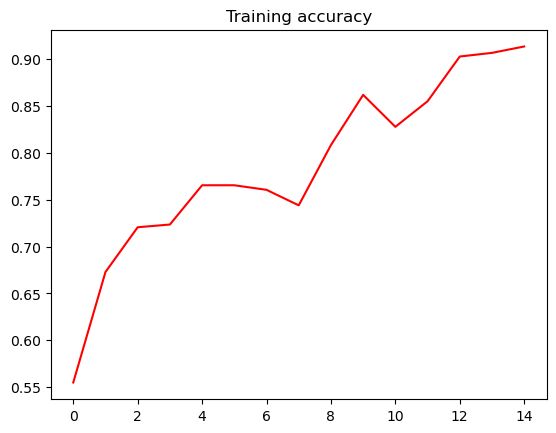

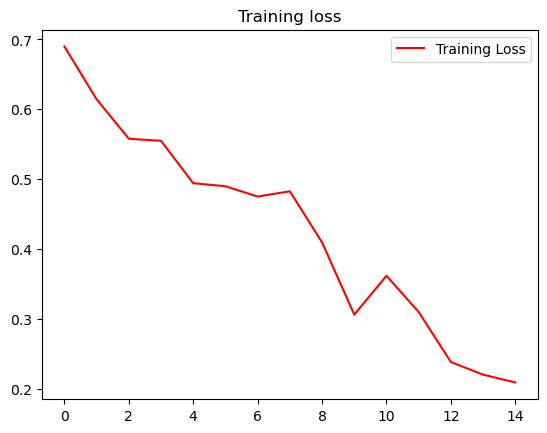

In [12]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()
